In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from sklearn.model_selection import train_test_split
from utils.string_clean import CleanStrings

plt.style.use('bmh')

In [14]:
HOME_PATH = Path.home()
PATH_TO_RAW_DATA = 'art_data/train_data/bbc_articles.csv'

In [15]:
df = pd.read_csv(HOME_PATH/PATH_TO_RAW_DATA)

Num of records and null values

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 3 columns):
article        2224 non-null object
label          2224 non-null object
article_len    2224 non-null int64
dtypes: int64(1), object(2)
memory usage: 52.2+ KB


Split data into train and test

In [17]:
X = df[['article','article_len']].copy()
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

Distribution of labels

Text(0, 0.5, 'Volume')

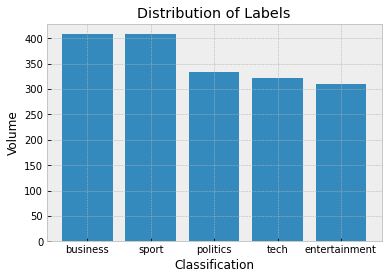

In [18]:
labels = y_train.value_counts()

plt.bar(labels.index, labels.values)
plt.title('Distribution of Labels')
plt.xlabel('Classification')
plt.ylabel('Volume')

Article length

No handles with labels found to put in legend.


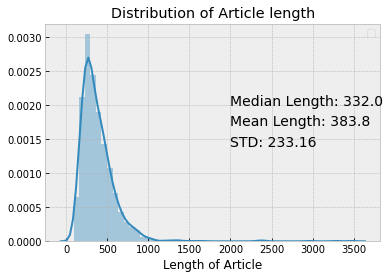

In [19]:
def plot_art_length(art_len : pd.Series, label=None, stats_show=True ,**kwargs)-> None:
    """Plots distribution plot
    
    """
    
    sns.distplot(art_len, label=label)
    
    if label == None:
        plt.title('Distribution of Article length')
    else:
        plt.title(f'Distribution of Article length for {label}')
        
    plt.xlabel('Length of Article')

    if stats_show == True:
        plt.text(2000,0.0020,f'Median Length: {art_len.median()}',  size=14)
        plt.text(2000,0.0017, f'Mean Length: {art_len.mean().round(2)}', size=14)
        plt.text(2000,0.0014, f'STD: {art_len.std().round(2)}', size=14)
        
    plt.legend()

art_len = X_train['article_len']
plot_art_length(art_len)

We have some very long article but most have a length in the range of 0 to 900 words

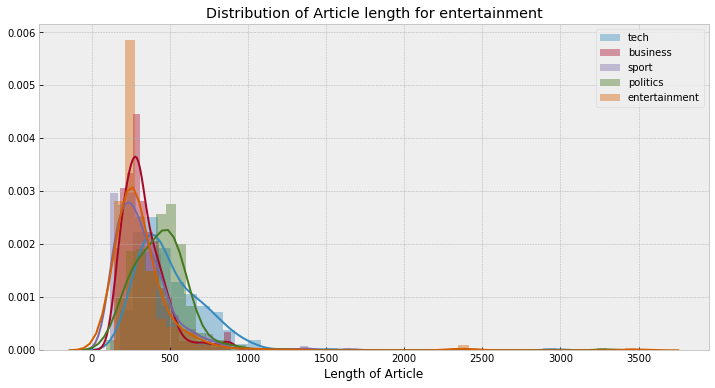

In [20]:
labels = y_train.unique()

temp_df = X_train.join(y_train).copy()

for i, label in enumerate(labels):
    
    plt.figure(1, figsize=(12,6))
    art_len_by_label = temp_df['article_len'][temp_df['label']==label]
    
    plot_art_length(art_len_by_label, label, '', alpha=0.5)
    

Politics and tech have a wider spread of article length. On average they will be longer articles.

In [21]:
X_train

,article,article_len
1950,Swap offer for pirated Windows XP\n\nComputer ...,353
170,India seeks to boost construction\n\nIndia has...,389
2008,Speech takes on search engines\n\nA Scottish f...,514
1464,IAAF awaits Greek pair's response\n\nKostas Ke...,261
2165,Open source leaders slam patents\n\nThe war of...,380
...,...,...
1555,Yelling takes Cardiff hat-trick\n\nEuropean cr...,122
1034,Profile: David Blunkett\n\nBefore he resigned ...,636
1289,Labour chooses Manchester\n\nThe Labour Party ...,252
1808,Italy 8-38 Wales\n\nWales secured their first ...,723
